# Configurações Iniciais

In [1]:
# Importando as bibliotecas necessárias
!pip install xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import tkinter
import plotly.express as px
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *
from sklearn.feature_selection import RFECV, SelectFromModel
import xgboost as xgb
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from joblib import dump, load
from datetime import datetime, timedelta
from math import *
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score
import skuPreditor as pr


In [5]:
# Retirar os limitadores de coluna
pd.set_option('display.max_columns', None)

# Unindo as bases de dados e removendo as não utilizadas
# P.S: Substituir a origem da base pela origem na sua máquina
df_2020 = pd.read_csv("base_inteli 2020_2021.csv", sep =";")
df_2022 = pd.read_csv("base_inteli_2022_2023.csv", sep =';')
df_all = pd.concat([df_2020, df_2022])

# Exploração dos dados


### Identificação das colunas

A identificação das colunas desempenha um papel importante no processo de exploração. Através dela, podemos conhecer mais sobre os tipos de dados presente em cada coluna e direcionar o tratamento adequado que iremos utilizar para cada caso.

In [15]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 814134 entries, 0 to 433253
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          814134 non-null  object 
 1   weekday_name                  814134 non-null  object 
 2   sku                           814134 non-null  object 
 3   unit_price                    814134 non-null  float64
 4   mobly_item                    814134 non-null  object 
 5   shipment_type                 814134 non-null  object 
 6   anchor_category               814134 non-null  object 
 7   product_department            814134 non-null  object 
 8   product_category              814134 non-null  object 
 9   origin_country                814134 non-null  object 
 10  process_costing               814134 non-null  object 
 11  sku_color                     814134 non-null  object 
 12  sku_height                    780110 non-null  fl

Através do método `info()`, foi possível classificar nossas características em numéricas ou categóricas:

**Colunas numéricas**

---

* unit_price
* sku_height
* sku_width
* sku_length
* sku_weight
* winning_price
* revenue
* items_sold
* avg_website_visits_last_week
* supplier_delivery_time
* stock_qty
* revenue_bundle
* items_sold_bundle
<br>
<br>

**Colunas categóricas**

---



* date
* weekday_name
* sku
* mobly_item
* shipment_type
* anchor_category
* product_department
* product_category
* origin_country
* process_costing
* sku_color
* price_status
* flag_bundle

### Estatística descritiva das colunas



A estatística descritiva é uma parte da estatística que envolve a coleta, organização, resumo e interpretação de dados para descrever características importantes de um conjunto de informações. Ela se concentra em transformar dados brutos em informações compreensíveis e significativas, permitindo uma compreensão mais clara das tendências, padrões e distribuições presentes nos dados.

Para o caso do nosso projeto, a estatística descritiva desempenha um papel importante para a ideação de um modelo preditivo de regressão. Antes de construir esse modelo, é fundamental entender a distribuição dos dados históricos de vendas. Então, a estatística descritiva, como a média, mediana, desvio padrão e percentis, ajuda a identificar não apenas as tendências, mas também os outliers nos dados de vendas passados.

O método nativo `describe()` da biblioteca Pandas foi utilizado para fazer a análise exploratória dos dados, já que fornece estatísticas para cada uma das colunas do dataframe.

In [16]:
df_all.describe()

,unit_price,sku_height,sku_width,sku_length,sku_weight,winning_price,revenue,items_sold,avg_website_visits_last_week,supplier_delivery_time,stock_qty,revenue_bundle,items_sold_bundle
count,814134.000000,780110.000000,780110.000000,780110.000000,780110.000000,163366.000000,814134.000000,814134.000000,814134.000000,814134.000000,814134.000000,814134.000000,814134.000000
mean,1072.653216,37.777547,73.354083,145.321921,59.136370,827.837739,1902.447319,2.672200,110.400421,23.383754,61.298798,96.368492,0.698966
std,788.378231,23.959331,27.939949,61.974311,76.332352,667.010802,4243.519909,6.041399,178.343749,27.321443,165.504622,627.624312,1.242135
min,69.990000,0.200000,0.800000,1.000000,1.000000,0.990000,-32.660000,0.000000,0.000000,2.000000,-1.000000,0.000000,0.000000
25%,535.860000,13.000000,51.000000,90.000000,16.200000,366.900000,0.000000,0.000000,20.000000,8.000000,0.000000,0.000000,0.000000
50%,859.900000,35.000000,75.000000,152.000000,36.000000,692.540000,636.200000,1.000000,51.857143,11.000000,2.000000,0.000000,1.000000
75%,1399.980000,60.000000,90.000000,189.000000,63.850000,1072.820000,2201.650000,3.000000,127.714286,17.000000,57.000000,0.000000,1.000000
max,13750.000000,152.000000,240.000000,690.000000,553.570000,9399.860000,393247.510000,647.000000,8038.285714,80.000000,4426.000000,69583.980000,164.000000


Com o banco de dados original apresentando algumas informações faltantes em certas linhas, as estatísticas descritivas puderam ser utilizadas para imputar os dados ausentes. Isso pôde ser feito por meio da utilização da mediana, por exemplo, atribuindo o valor dessa tendência central nos campos em branco.

# Pré-processamento


### Limpeza de dados


**Tratamento de itens não disponíveis e de missings**

---
Removemos as colunas que possuíam somente um valor exclusivo, aquelas que apresentavam mais de 50% dos seus valores vazios ou sem registro e as que continham valores irrelevantes para o nosso modelo.

As colunas possuíam poucos missing values, apenas presentes em algumas dimensões de sku’s, então optamos por substituir esses valores por 0, visto que a inexistência de informações sobre suas dimensões não alterava em sua venda.

Além disso, verificamos os items no período em que suas visitas e items vendidos correspondiam a 0, pois estes eram períodos em que estavam cadastrados porém não visíveis para compra

In [6]:
# Função para encontrar o índice da primeira venda ou visita
def find_first_occurrence(df_all):
    condition = (df_all['items_sold'] > 0) | (df_all['avg_website_visits_last_week'] > 0)
    if condition.any():
        return condition.idxmax()
    else:
        return None

# Aplica a função para cada grupo de Produto e cria a máscara
mask = df_all.groupby('sku').apply(find_first_occurrence).reset_index(name='first_occurrence_index')
df_all = df_all.merge(mask, on='sku', how='left')
keep_rows = df_all.index >= df_all['first_occurrence_index']

# Filtrar o dataframe usando a máscara
df_all = df_all[keep_rows].drop(columns=['first_occurrence_index'])



In [7]:
# Remoção das colunas desnecessárias
df_fixed = df_all.drop(["mobly_item",'price_status','winning_price', 'revenue','revenue_bundle'], axis ='columns').fillna(0).reset_index(drop = True)


### Criação da coluna de "has_stock"

In [8]:
# Criação da coluna de "has_stock", baseado se algum produto tinha estoque maior que 0
df_fixed['has_stock'] = df_fixed['stock_qty'].apply(lambda x: 'tem' if x > 0 else 'não')

### Remoção de linhas de estoque negativo

In [9]:
df_fixed[df_fixed['items_sold'] != -1].reset_index(drop=True, inplace=True)

### Adequação de variáveis numéricas e categóricas


**Separação das variáveis**

---
Todas as colunas em nossa database foram percorridas, contando o número de valores únicos presentes. Com base nessa contagem, foi possível compreender a variedade de categorias por atributo, separando as colunas pelo método que seriam codificadas: One-Hot Encoder ou Label Encoder.

In [10]:
# Código que itera entre os items da coluna para decidir qual codificação realizar
columns = list(df_fixed.columns)

columns_to_one_hot = []
columns_to_ordinal = []

for i in columns:
    if len(df_fixed[i].unique()) > 7:
        columns_to_ordinal.append(i)
    else:
        columns_to_one_hot.append(i)



print('Ordinal Encoding: ',columns_to_ordinal)
print('One-Hot Encoding: ',columns_to_one_hot)

Ordinal Encoding:  ['date', 'sku', 'unit_price', 'anchor_category', 'product_category', 'sku_color', 'sku_height', 'sku_width', 'sku_length', 'sku_weight', 'items_sold', 'avg_website_visits_last_week', 'supplier_delivery_time', 'stock_qty', 'items_sold_bundle']
One-Hot Encoding:  ['weekday_name', 'shipment_type', 'product_department', 'origin_country', 'process_costing', 'flag_bundle', 'has_stock']


**One-Hot Encoder**


---

Empregamos o One-Hot Encoder em colunas categóricas com até 7 elementos. Essa escolha foi feita para converter essas colunas em um formato binário sem sobrecarregar o sistema. O processo desse codificador gera uma coluna nova para representar cada categoria, na qual o valor é atribuído como "1" ou "0" para indicar se está presente ou ausente, respectivamente.





In [11]:
# Selecionando as colunas para sofrerem codificação
columns_to_encode = ['shipment_type', 'product_department', 'origin_country', 'process_costing', 'flag_bundle']
data_to_encode = df_fixed[columns_to_encode]

# Transformando as colunas para um novo DataFrame
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(data_to_encode)
df_oneHot = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(columns_to_encode))

# Substituir as colunas originais pelas colunas do df_oneHot
df_fixed_encoded = df_fixed.drop(columns=columns_to_encode)  # Remover as colunas originais
df_fixed_encoded = pd.concat([df_fixed_encoded, df_oneHot], axis=1)  # Concatenar as colunas codificadas

c:\Users\Inteli\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Ordinal Encoder**


---

Utilizamos o Ordinal Encoder em colunas categóricas com 7 ou mais elementos. Nesse processo, cada item da categoria era atribuído a um número inteiro distinto, não expandindo o número de colunas, onde a ordenação de como esses números são gerados se baseia na quantidade de items que foram vendidos daquele item na categoria




In [12]:
# Agrupa os items vendidos de acordo com cada item de uma coluna
color_sums = df_fixed_encoded.groupby(['sku_color'])['items_sold'].sum().sort_values(ascending=True)
sku_sums = df_fixed_encoded.groupby(['sku'])['items_sold'].sum().sort_values(ascending=True)
anchor_sums = df_fixed_encoded.groupby(['anchor_category'])['items_sold'].sum().sort_values(ascending=True)
product_sums = df_fixed_encoded.groupby(['product_category'])['items_sold'].sum().sort_values(ascending=True)
stock_sums = df_fixed_encoded.groupby(['has_stock'])['items_sold'].sum().sort_values(ascending=True)

# Cria um dicionário mapeando as cores de forma ordinal (Maior para menor)
color_ordinal_mapping = {color: i for i, color in enumerate(color_sums.index)}
sku_ordinal_mapping = {sku: i for i, sku in enumerate(sku_sums.index)}
anchor_ordinal_mapping = {anchor: i for i, anchor in enumerate(anchor_sums.index)}
product_ordinal_mapping = {product: i for i, product in enumerate(product_sums.index)}
stock_ordinal_mapping = {stock: i for i, stock in enumerate(stock_sums.index)}

# Aplica Ordinal encoding
encoder_color = OrdinalEncoder(categories=[list(color_ordinal_mapping.keys())])
encoder_sku = OrdinalEncoder(categories=[list(sku_ordinal_mapping.keys())])
encoder_anchor = OrdinalEncoder(categories=[list(anchor_ordinal_mapping.keys())])
encoder_product = OrdinalEncoder(categories=[list(product_ordinal_mapping.keys())])
encoder_stock = OrdinalEncoder(categories=[list(stock_ordinal_mapping.keys())])


# Cria as novas colunas
df_fixed_encoded['color_encoded'] = encoder_color.fit_transform(df_fixed_encoded[['sku_color']])
df_fixed_encoded['sku_encoded'] = encoder_sku.fit_transform(df_fixed_encoded[['sku']])
df_fixed_encoded['anchor_category_encoded'] = encoder_anchor.fit_transform(df_fixed_encoded[['anchor_category']])
df_fixed_encoded['product_category_encoded'] = encoder_product.fit_transform(df_fixed_encoded[['product_category']])
df_fixed_encoded['has_stock_encoded'] = encoder_stock.fit_transform(df_fixed_encoded[['has_stock']])

# Removendo as colunas antigas
df_encoded = df_fixed_encoded.drop(['sku','anchor_category','product_category','sku_color', 'has_stock'], axis = 1)


**Tratamento de datas**


---
A coluna "date" possui uma alta relevância para nosso modelo, porém necessitava ser modificada para se adaptar melhor ao funcionamento dele.

Transformamos seu formato de Ano / Mês / Dia para uma divisão em diversas colunas representando. Assim, o modelo consegue ler melhor os dados de data uma vez que eles foram passados de String > DateTime > Números, facilitando o entendimento da máquina e do modelo.


In [13]:
# Transformar os valores de "String" de data em "DateTime"
df_encoded['date'] = pd.to_datetime(df_encoded['date'], format='%Y-%m-%d')

# Extraindo os componentes da date
df_encoded['ano'] = df_encoded['date'].dt.year
df_encoded['mes'] = df_encoded['date'].dt.month
df_encoded['dia'] = df_encoded['date'].dt.day
df_encoded['dia_da_semana'] = df_encoded['date'].dt.weekday  
df_encoded['semana_do_ano'] = df_encoded['date'].dt.isocalendar().week
df_encoded['trimestre'] = df_encoded['date'].dt.quarter
df_encoded['dia_do_ano'] = df_encoded['date'].dt.dayofyear
df_encoded['eh_fim_de_semana'] = df_encoded['date'].dt.weekday >= 5  

# Remoção das colunas antigas
df_dates_fixed = df_encoded.drop(['weekday_name','date'], axis = 1)

### Remoção da black-friday

In [14]:
# Removendo as semanas que representam a black friday
df_final = df_dates_fixed.drop(df_dates_fixed[(df_dates_fixed['semana_do_ano'] >= 46) & (df_dates_fixed['semana_do_ano'] <= 51)].index)
df_final = df_final.reset_index(drop=True)

# Hipóteses

As hipóteses são possíveis explicações das tendências comportamentamentais dos dados, ajudando a compreensão deste e guiando enfim a acurácia mais precisa do modelo preditivo.

### Hipótese #1

Como explicado pelos internos da Mobly, o "crossdocking" é um sistema em que os itens são entregues diretamente do fornecedor para os centros de distribuição encaminharem para os clientes, sem passar pelo estoque. Esse método é utilizado quando não há o produto no estoque. Fizemos uma análise das colunas de 'shipment_type', 'sotck_qty' e 'items_sold', notando que algumas informações se destoam das que foram informadas.


É possível visualizar no gráfico abaixo que a maior parte das vendas ocorreram em produtos que já estavam em estoque.



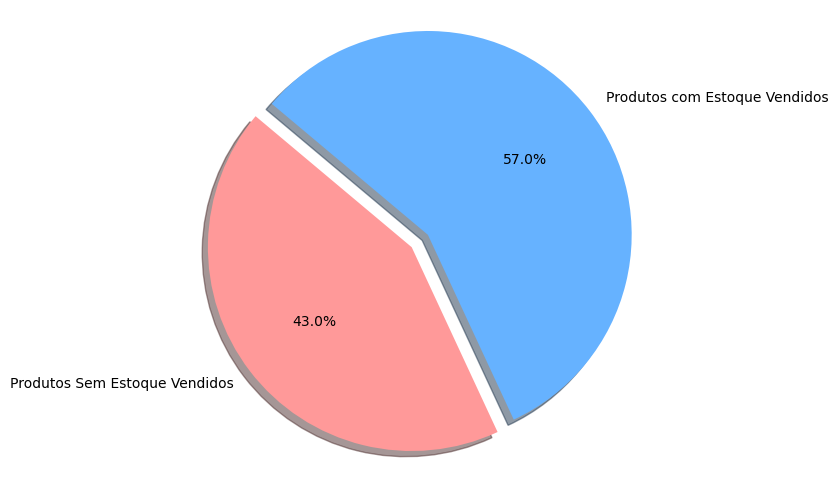

In [ ]:
# Classificando os produtos
produtos_vazios_vendidos = df_final[df_final['stock_qty'] <= 0]
produtos_com_estoque_vendidos = df_final[df_final['stock_qty'] > 0]

#Contando o número de produtos em cada categoria
num_produtos_vazios_vendidos = len(produtos_vazios_vendidos)
num_produtos_com_estoque_vendidos = len(produtos_com_estoque_vendidos)

# Criando o gráfico de pizza
labels = ['Produtos Sem Estoque Vendidos', 'Produtos com Estoque Vendidos']
sizes = [num_produtos_vazios_vendidos, num_produtos_com_estoque_vendidos]
colors = ['#ff9999', '#66b2ff']
explode = (0.1, 0)  # Explode 1st slice

# Plot
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

No entanto, neste segundo gráfico, obtemos a informação de que mais de 70% das vendas foram realizadas por crossdocking.


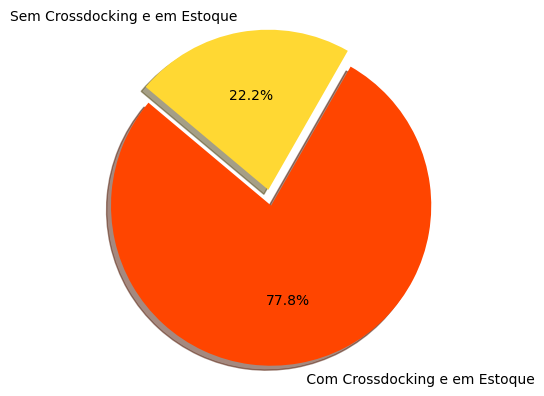

In [ ]:
crossdocking_and_in_stock = df_final.loc[(df_final['shipment_type_crossdocking'] == 1.0) & (df_final['stock_qty'] > 0)]

# Contando a quantidade de SKUs únicos que fazem crossdocking e estão no estoque
unique_skus_crossdocking_and_in_stock = crossdocking_and_in_stock['sku_encoded'].nunique()

# Contando a quantidade total de SKUs únicos
total_unique_skus = df_final['sku_encoded'].nunique()
labels = [' Com Crossdocking e em Estoque', 'Sem Crossdocking e em Estoque']
# Calculando a quantidade de SKUs que não fazem crossdocking e estão no estoque
unique_skus_not_crossdocking_and_in_stock = total_unique_skus - unique_skus_crossdocking_and_in_stock

# Criando um gráfico de pizza
sizes = [unique_skus_crossdocking_and_in_stock, unique_skus_not_crossdocking_and_in_stock]
colors = ['#FF4500', '#FFD833']
explode = (0.1, 0)  # Explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Assim, é apresentado uma aparente contradição nos dados: enquanto a primeira análise sugere que a maioria das vendas provém de estoque próprio, a análise subsequente mostra que, na realidade, a maior parte das vendas é feita através do crossdocking.

Neste terceiro gráfico, é possível concluir que realmente houve a venda de produtos, por crossdocking, que possuíam alta disponibilidade em estoque.

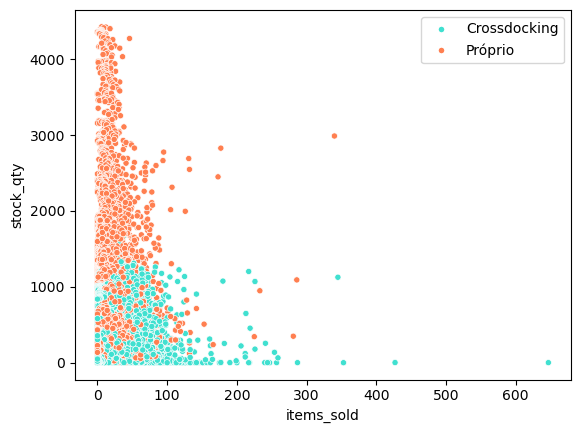

In [ ]:
from matplotlib.lines import Line2D
#Define a separação por cor
colors = df_fixed['shipment_type'].map({'crossdocking': 'turquoise', 'próprio': 'coral'})

#Cria o gráfico de dispersão
ax = df_fixed.plot.scatter(x='items_sold', y='stock_qty', c=colors, edgecolors='w', linewidth=0.5)

#Cria as legendas
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Crossdocking', markerfacecolor='turquoise', markersize=5),
                   Line2D([0], [0], marker='o', color='w', label='Próprio', markerfacecolor='coral', markersize=5)]
ax.legend(handles=legend_elements)

#Apresenta o gráfico
plt.show()

Conseguimos elaborar duas hipóteses sobre o motivo dessa contradição:
* Em algumas situações, um produto pode ter sido vendido em quantidade superior ao estoque disponível e diferente de zero, sendo atendido parcialmente pelo estoque e parcialmente pelo crossdocking. Isso pode levar a classificar a venda inteira como “crossdocking”, distorcendo a representação percentual das vendas e levando à percepção de uma prevalência maior do que realmente existe.

In [ ]:
vendas_mistas = df_encoded[['shipment_type_crossdocking','items_sold', 'stock_qty']]
vendas_mistas[(vendas_mistas['shipment_type_crossdocking'] == 1) & (vendas_mistas['items_sold'] > vendas_mistas['stock_qty']) & (vendas_mistas['stock_qty'] > 1)]

,shipment_type_crossdocking,items_sold,stock_qty
213,1.0,5,3
532,1.0,4,2
533,1.0,6,2
584,1.0,16,3
603,1.0,38,12
...,...,...,...
811037,1.0,5,3
811438,1.0,5,4
811530,1.0,4,2
811795,1.0,4,3


* Em outras situações, o processamento da venda via crossdocking ser realizado mesmo havendo estoque disponível pode ser explicado pelo sistema de vendas agendadas. Neste sistema, o produto é enviado diretamente ao cliente no período escolhido por ele, sem passar pelo estoque convencional.

In [ ]:
vendas_agendadas = df_encoded[['shipment_type_crossdocking','items_sold', 'stock_qty']]
vendas_agendadas[(vendas_agendadas['shipment_type_crossdocking'] == 1) & (vendas_agendadas['items_sold'] > 0) & (vendas_agendadas['stock_qty'] > 0)]

,shipment_type_crossdocking,items_sold,stock_qty
6,1.0,2,84
17,1.0,1,8
33,1.0,7,365
34,1.0,1,176
45,1.0,2,91
...,...,...,...
812582,1.0,2,17
812627,1.0,1,15
812635,1.0,1,30
812687,1.0,1,8


### Hipótese #2
A análise dos gráficos mostra uma tendência curiosa no comportamento dos visitantes do site. Em julho, há um pico de visitas, superado apenas por novembro. Contudo, apesar do grande número de visitantes e dos preços médios mais baixos em julho, o volume de vendas é surpreendentemente baixo. Além disso, julho se destaca por ter muitas visitas e uma grande redução de itens em estoque. Isso levanta a questão: Por que em julho, com alto tráfego e preços reduzidos, as vendas são tão baixas em comparação a outros meses? É necessário investigar as causas desse comportamento atípico.

Abaixo é possível analisar a quantidade de vendas e a média de preço dos produtos por mês em um intervalo de 3 anos (2020, 2021, 2022). Nota-se que em julho as vendas e os preços são baixos.


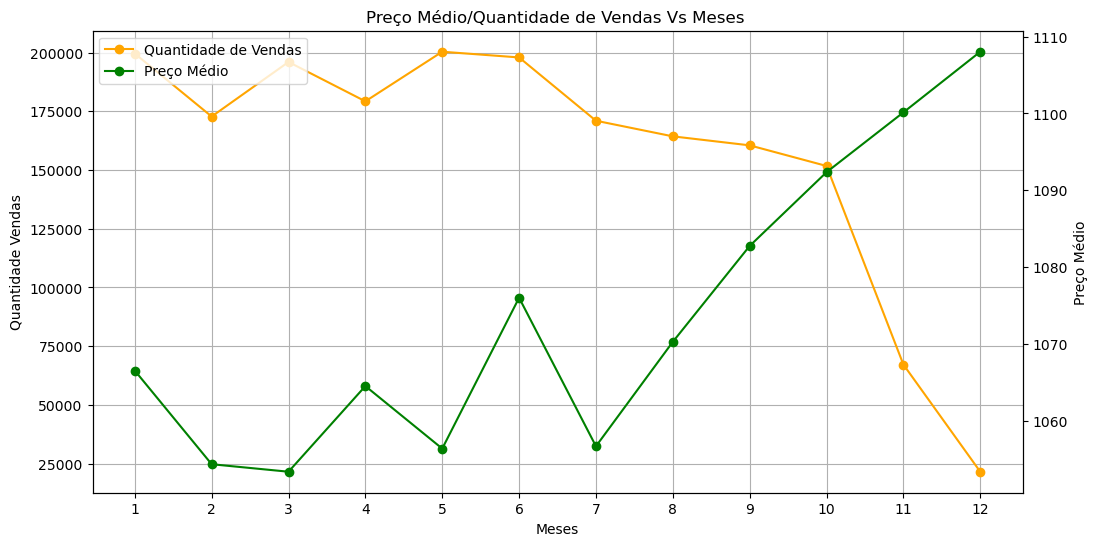

In [ ]:

df_items_sold = df_final[['mes', 'items_sold']]
grouped_items_sold = df_items_sold.groupby('mes').sum()

df_filtered_price = df_dates_fixed[['mes', 'unit_price']]
grouped_data_price = df_filtered_price.groupby('mes').mean()

df_filtered_stock = df_final[['mes', 'stock_qty']]
grouped_data_stock = df_filtered_stock.groupby('mes').mean()

plt.figure(figsize=(12, 6))

line1, = plt.plot(grouped_items_sold.index, grouped_items_sold['items_sold'], marker='o', linestyle='-', color='orange', label='Quantidade de Vendas')
plt.xlabel('Meses')
plt.ylabel('Quantidade Vendas')
plt.title('Preço Médio/Quantidade de Vendas Vs Meses ')
plt.grid(True)

plt.xticks(list(range(1, 13)), list(range(1, 13)))
ax2 = plt.gca().twinx()
line2, = ax2.plot(grouped_data_price.index, grouped_data_price['unit_price'], marker='o', linestyle='-', color='green', label='Preço Médio')
ax2.set_ylabel('Preço Médio')

lines = [line1, line2]
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper left')

plt.show()

Abaixo é possível analisar a média da quantidade no estoque e as visitas no site por mês em um intervalo de 3 anos (2020, 2021, 2022). Nota-se que curiosamente as visitas no site estão muito altas, enquanto o estoque, os preços, e as vendas estão em baixa.


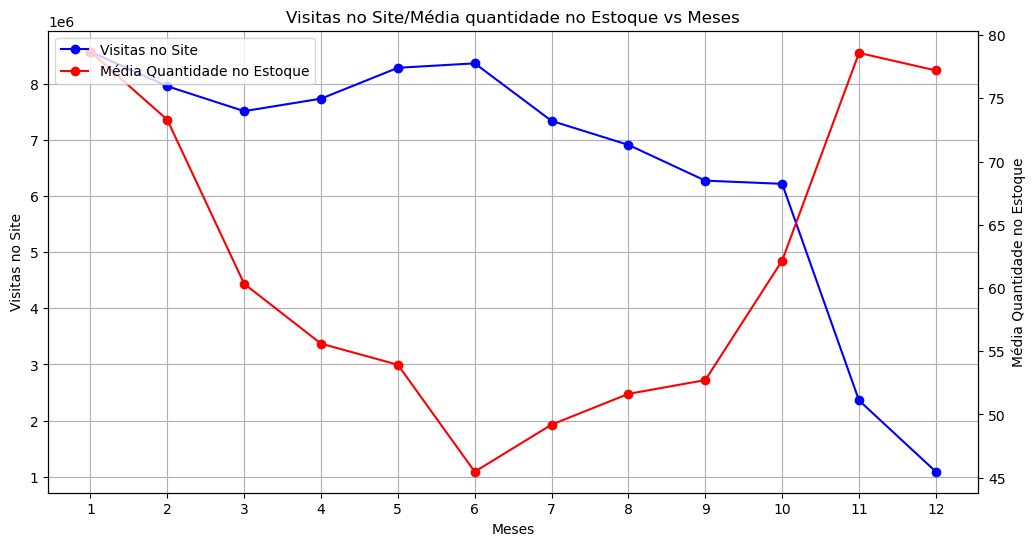

In [ ]:
# Filtrando o DataFrame para pegar apenas as colunas relevantes para a primeira análise
df_items_sold = df_final[['mes', 'avg_website_visits_last_week']]
# Agrupando os dados por 'mes' e calcule a soma dos items vendidos
grouped_items_sold = df_items_sold.groupby('mes').sum()

# Filtrando o DataFrame para pegar apenas as colunas relevantes para a segunda análise
df_filtered_price = df_dates_fixed[['mes', 'stock_qty']]
# Agrupando os dados por 'mes' e calcule a média do 'unit_price'
grouped_data_price = df_filtered_price.groupby('mes').mean()

# Filtrando o DataFrame para pegar apenas as colunas relevantes para a terceira análise
df_filtered_stock = df_final[['mes', 'stock_qty']]
# Agrupando os dados por 'mes' e calcule a média do 'stock_qty'
grouped_data_stock = df_filtered_stock.groupby('mes').mean()

# Criando um gráfico de linha juntando todas as informações
plt.figure(figsize=(12, 6))

# Primeiro eixo y (esquerdo)
line1, = plt.plot(grouped_items_sold.index, grouped_items_sold['avg_website_visits_last_week'], marker='o', linestyle='-', color='blue', label='Visitas no Site')
plt.xlabel('Meses')
plt.ylabel('Visitas no Site')
plt.title('Visitas no Site/Média quantidade no Estoque vs Meses')
plt.grid(True)

# Ajustando os ticks do eixo x
plt.xticks(list(range(1, 13)), list(range(1, 13)))

# Criando um segundo eixo y à direita
ax2 = plt.gca().twinx()
line2, = ax2.plot(grouped_data_price.index, grouped_data_price['stock_qty'], marker='o', linestyle='-', color='red', label='Média Quantidade no Estoque')
ax2.set_ylabel('Média Quantidade no Estoque')

# Combinando as legendas
lines = [line1, line2]
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper left')

plt.show()


Conseguimos elaborar uma hipótese sobre o motivo dessa contradição:

* Julho é um mês em que muitas empresas fazem liquidações devido à sua posição estratégica no calendário comercial, oferecendo promoções e descontos. Essas ofertas aumentam o tráfego em sites de e-commerce e atraem muitos consumidores. No entanto, surge o desafio da gestão de estoque. Se produtos desejados pelos clientes não estiverem disponíveis, mesmo com preços reduzidos, isso pode afetar negativamente as vendas, frustrando os compradores. Assim, é vital uma boa gestão de estoque durante essas promoções para atender à demanda e garantir a satisfação do cliente.

### Hipótese #3

Os gráficos que relacionam "preço" e "vendas" nos anos de 2020, 2021 e 2022 revelam uma tendência notável. Nos primeiros dois anos, as vendas aumentaram proporcionalmente aos preços, indicando uma relação direta entre eles. No entanto, em 2022, essa tendência mudou, com as vendas diminuindo à medida que os preços aumentavam e vice-versa. Esse novo padrão levanta questionamentos sobre por que as vendas se elevaram em 2020 e 2021, apesar dos aumentos nos preços, enquanto o oposto ocorreu em 2022. Assim, foram propostas hipóteses para explicar essa mudança.

Abaixo é possível analisar a quantidade de vendas e a média de preço dos produtos no ano de 2020. Nota-se que os preços e vendas tendem a seguir mejoritariamente a mesma linha de cresciemento.


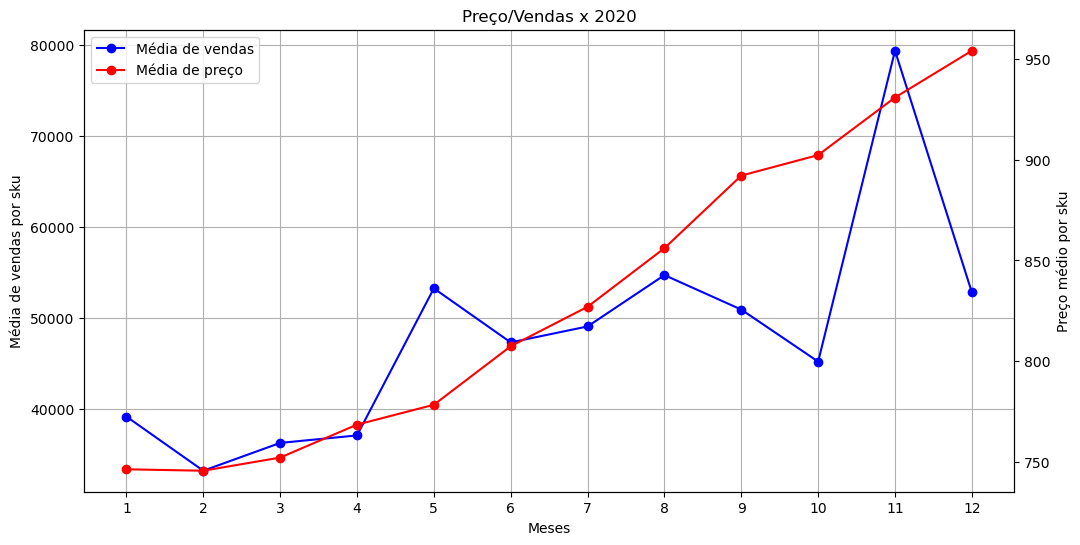

In [ ]:
sold_2020 = df_encoded.loc[df_encoded['ano'] == 2020]
df_items_sold = sold_2020[['mes', 'items_sold']]
grouped_items_sold = df_items_sold.groupby('mes').sum()

price_2020 = df_dates_fixed.loc[df_dates_fixed['ano'] == 2020]
df_filtered_price = price_2020[['mes', 'unit_price']]
grouped_data_price = df_filtered_price.groupby('mes').mean()

df_filtered_stock = df_encoded[['mes', 'unit_price']]
grouped_data_stock = df_filtered_stock.groupby('mes').mean()

plt.figure(figsize=(12, 6))
line1, = plt.plot(grouped_items_sold.index, grouped_items_sold['items_sold'], marker='o', linestyle='-', color='blue', label='Média de vendas')
plt.xlabel('Meses')
plt.ylabel('Média de vendas por sku')
plt.title('Preço/Vendas x 2020')
plt.grid(True)

plt.xticks(list(range(1, 13)), list(range(1, 13)))
ax2 = plt.gca().twinx()
line2, = ax2.plot(grouped_data_price.index, grouped_data_price['unit_price'], marker='o', linestyle='-', color='red', label='Média de preço')
ax2.set_ylabel('Preço médio por sku')

lines = [line1, line2]
labels = [l.get_label() for l in lines]

plt.legend(lines, labels, loc='upper left')
plt.show()

Abaixo é possível analisar a quantidade de vendas e a média de preço dos produtos no ano de 2021. Nota-se novamente que os preços e vendas tendem a seguir mejoritariamente a mesma linha de cresciemento.


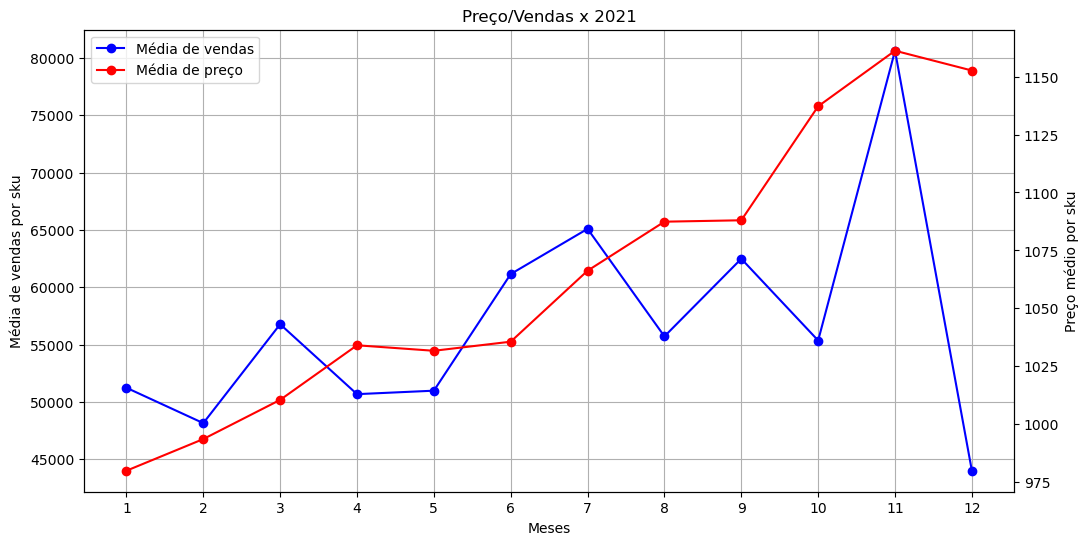

In [ ]:

sold_2020 = df_encoded.loc[df_encoded['ano'] == 2021]
df_items_sold = sold_2020[['mes', 'items_sold']]
grouped_items_sold = df_items_sold.groupby('mes').sum()

price_2020 = df_dates_fixed.loc[df_dates_fixed['ano'] == 2021]
df_filtered_price = price_2020[['mes', 'unit_price']]
grouped_data_price = df_filtered_price.groupby('mes').mean()

df_filtered_stock = df_encoded[['mes', 'unit_price']]
grouped_data_stock = df_filtered_stock.groupby('mes').mean()

plt.figure(figsize=(12, 6))
line1, = plt.plot(grouped_items_sold.index, grouped_items_sold['items_sold'], marker='o', linestyle='-', color='blue', label='Média de vendas')
plt.xlabel('Meses')
plt.ylabel('Média de vendas por sku')
plt.title('Preço/Vendas x 2021')
plt.grid(True)

plt.xticks(list(range(1, 13)), list(range(1, 13)))
ax2 = plt.gca().twinx()

line2, = ax2.plot(grouped_data_price.index, grouped_data_price['unit_price'], marker='o', linestyle='-', color='red', label='Média de preço')
ax2.set_ylabel('Preço médio por sku')
lines = [line1, line2]
labels = [l.get_label() for l in lines]

plt.legend(lines, labels, loc='upper left')
plt.show()

Abaixo é possível analisar a quantidade de vendas e a média de preço dos produtos no ano de 2022. Diferentemente dos anos anteriores nota-se que os preços e vendas tiveram um crescimento inversamente proporcional, ou seja, enquanto um aumentava o outro diminuia seu valor.


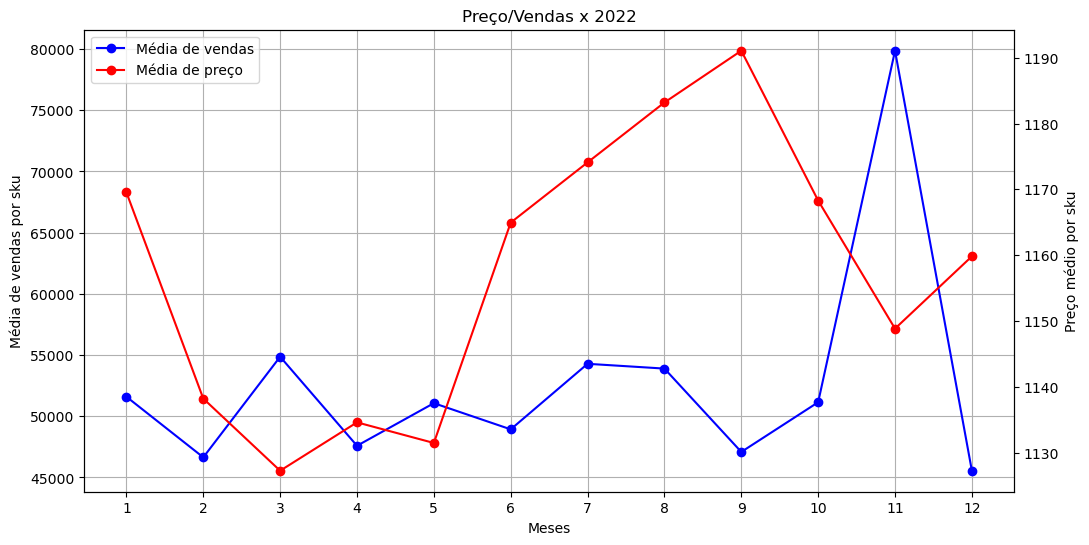

In [ ]:
sold_2020 = df_encoded.loc[df_encoded['ano'] == 2022]
df_items_sold = sold_2020[['mes', 'items_sold']]
grouped_items_sold = df_items_sold.groupby('mes').sum()

price_2020 = df_dates_fixed.loc[df_dates_fixed['ano'] == 2022]
df_filtered_price = price_2020[['mes', 'unit_price']]
grouped_data_price = df_filtered_price.groupby('mes').mean()

df_filtered_stock = df_encoded[['mes', 'unit_price']]
grouped_data_stock = df_filtered_stock.groupby('mes').mean()
plt.figure(figsize=(12, 6))

line1, = plt.plot(grouped_items_sold.index, grouped_items_sold['items_sold'], marker='o', linestyle='-', color='blue', label='Média de vendas')
plt.xlabel('Meses')
plt.ylabel('Média de vendas por sku')
plt.title('Preço/Vendas x 2022')
plt.grid(True)

plt.xticks(list(range(1, 13)), list(range(1, 13)))
ax2 = plt.gca().twinx()

line2, = ax2.plot(grouped_data_price.index, grouped_data_price['unit_price'], marker='o', linestyle='-', color='red', label='Média de preço')
ax2.set_ylabel('Preço médio por sku')
lines = [line1, line2]
labels = [l.get_label() for l in lines]

plt.legend(lines, labels, loc='upper left')
plt.show()

Conseguimos elaborar uma hipótese sobre o motivo dessa quebra no padrão de crescimento:

Fatores Macroeconômicos: Nos anos de 2020 e 2021, a pandemia de COVID-19 causou um aumento significativo no valor do dólar, elevando os preços das matérias-primas e, consequentemente, dos produtos da Mobly. A alta inflação nesse período também impactou os valores. Essas razões explicam o aumento nos preços mostrado nos gráficos de 2020 e 2021.

Impacto da Quarentena: A pandemia impulsionou a adoção do trabalho remoto, levando as pessoas a investirem em móveis para melhorar seus espaços domésticos. Isso resultou em uma demanda crescente por móveis, explicando o aumento nas vendas em 2020 e 2021.

Retomada Econômica e Normalização: Em 2022, a economia brasileira retomou suas atividades, levando à estabilidade dos preços e dos indicadores macroeconômicos. A menor demanda por móveis pós-pandemia levou a vendas estáveis. As vendas parecem ter sido sensíveis aos preços, aumentando quando os preços eram acessíveis e vice-versa. Isso pode explicar a quebra do padrão observado anteriormente.

# Gráficos


### Gráfico de relação das vendas mensais nos anos de 2020 a 2022

In [ ]:
df_final2 = df_final[df_final['ano'] != 2023]
monthly_sales = df_final2.groupby(['mes', 'ano'])['items_sold'].sum().reset_index()
fig = px.line(monthly_sales, x='mes', y='items_sold', animation_frame='ano')
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 8000
fig.update_layout(title='Total de vendas mensais por ano de 2020 a 2022')
fig.show()


Este gráfico representa o número de itens vendidos por mês, durante os 3 últimos anos (2020, 2021 e 2022).

Uma das características observadas nessa progressão foi aumento de vendas ao longo de três anos, que pode ser explicado por ser o crescimento da economia e do poder de compra dos consumidores, o que aumenta a demanda por produtos, aumento da popularidade da Mobly e a expansão de sua base de clientes. Além disso, existe um impacto muito grande da pandemia sobre as vendas online, que se tornaram mais comuns no cotidiano.

A segunda observação recorre à tendência de estabilização geral do gráfico de vendas ao longo dos anos, que pode ser atribuída à consistência na oferta de produtos e serviços pela Mobly. A empresa pode ter mantido uma estratégia de vendas consistente ao longo de três anos, o que resultou em flutuações suaves nas vendas.

Por último, foi analisado um pico de vendas em novembro pode ser explicado pela proximidade das festas de fim de ano e a Black Friday, principalmente. Durante esse período, muitas pessoas começam a comprar presentes para amigos e familiares, o que aumenta a demanda por produtos e é um período em que empresas realizam promoções e descontos durante esse período para atrair mais clientes, o que pode contribuir para o aumento das vendas.


### Gráfico de soma das visitas médias ao site por dia da semana

In [ ]:
monthly_sales = df_fixed.groupby(['weekday_name'])['avg_website_visits_last_week'].sum().reset_index()
dias_da_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monthly_sales['weekday_name'] = pd.Categorical(monthly_sales['weekday_name'], categories=dias_da_semana, ordered=True)
monthly_sales = monthly_sales.sort_values('weekday_name')
fig = px.bar(monthly_sales, x='weekday_name', y='avg_website_visits_last_week')
fig.update_layout(title='Soma das visitas médias ao site por dia da semana')
fig.update_yaxes(range=[12780000, 12880000])
fig.update_traces(marker_color='#FF9345')
fig.show()

A representação ilustra a distribuição da soma da média de visitantes no site durante os dias da semana.

Percebe-se que existem três tendências de visitas no site, uma em relação à baixa durante a terça-feira, outra sobre a estabilidade no final de semana e a última sobre a alta na segunda-feira.

A tendência de baixa nas terças-feiras pode ser explicada porque durante os dias úteis, as pessoas tendem a estar mais ocupadas com o trabalho e outras responsabilidades, o que pode diminuir o tempo disponível para navegar em sites de compras.

Durante o fim de semana, as pessoas geralmente têm mais tempo livre para se dedicar a atividades de lazer, incluindo navegar em sites de compras.

Já o aumento de visitas nas segundas-feiras pode ser explicado pelo fenômeno do ‘Efeito Segunda-feira’. Esse efeito se refere à tendência das pessoas de retornar ao trabalho após o fim de semana com uma atitude mais positiva e produtiva. Isso pode levar a um aumento na busca por atualizações e novidades, incluindo visitas a sites de compras.


# Preparação dos dados

Aqui descreveremos como serão realizadas cada etapa dos nossos modelos de machine learning

### Divisão do conjunto de treino e de teste
---
Para avaliar a capacidade de generalização do modelo, é necessário dividir o conjunto de dados em dois subconjuntos: treino e teste. O conjunto de treino é utilizado para treinar o modelo, enquanto o conjunto de teste é utilizado para avaliar o desempenho do modelo em dados não vistos anteriormente. Essa divisão é importante para evitar que o modelo memorize os dados de treino e não seja capaz de generalizar para novos dados.

### Seleção das features para o modelo de machine learning
---
Uma das etapas cruciais na construção de um modelo de machine learning é a seleção criteriosa das características (features) que servirão como entrada para o modelo. Cada feature foi selecionada com base em sua relevância para o problema em questão, com um teste de RFECV, e essa decisão é fundamental para garantir que nosso modelo seja capaz de aprender com eficácia e gerar previsões precisas. Após a seleção, são atualizadas as features a serem usadas e os dados são novamente divididos.

### Tunagem de hiperparâmetros
---
Nessa etapa, testamos quais os melhores hiperparâmetros, as "configurações" a serem usados por cada modelo. Realizamos um GridSearchCV, uma busca exaustiva testando diversas combinações de hiperparâmetros para encontrar a mais otimizada.

### Rodagem do modelo e métricas
---
Nessa fase, rodamos o modelo com as definições anteriores especificadas e realizamos a verificação das métricas para analizar a qualidade do modelo.

# Modelo de _Machine Learning_

# Modelos supervisonados de regressão
---
Os modelos de regressão são utilizados para prever valores contínuos, como por exemplo, o preço de um imóvel ou a quantidade de vendas de um produto. Neste projeto, utilizamos os seguintes modelos de regressão:
* Random Forest Regressor
* Gradient Boost Regressor
* Xtreme Gradient Boost Regressor

Random Forest Regressor
---
O Random Forest Regressor é um modelo de aprendizado de máquina que utiliza o método de florestas aleatórias para realizar a regressão. Esse modelo é uma extensão do Random Forest Classifier, que é um modelo de classificação. O Random Forest Regressor é um modelo muito poderoso, que apresenta um bom desempenho na maioria dos problemas de regressão. Além disso, ele é capaz de lidar com dados ausentes e valores discrepantes, o que é uma grande vantagem em relação a outros modelos de regressão.

In [ ]:
# Todas as features para testagem
# Há a remoção de 'items_sold' e 'items_sold_bundle' pois são tanto o target como um de seus subconjuntos
features = [    
    'unit_price',
    'sku_height',
    'sku_width',
    'sku_length',
    'sku_weight',
    'avg_website_visits_last_week',
    'supplier_delivery_time',
    'items_sold_bundle',
    'shipment_type_crossdocking',
    'shipment_type_próprio',
    'product_department_Cama e Banho',
    'product_department_Decoração',
    'product_department_Gamer',
    'product_department_Infantil',
    'product_department_Keva'	,
    'product_department_Móveis',
    'origin_country_Importado',
    'origin_country_Nacional',
    'process_costing_no'	,
    'process_costing_yes',
    'flag_bundle_SKU vendido em conjunto ou sozinho',
    'flag_bundle_SKU vendido somente sozinho',
    'has_stock_não',
    'has_stock_tem',
	'color_encoded',
    'sku_encoded',
    'anchor_category_encoded',
    'product_category_encoded', 'ano', 'semana_do_ano', 'sku_encoded', 'dollar_quotation']

In [ ]:
#Criando um dataframe a partir do df_final, com todas as colunas como feature
# Pegando uma amostragem de apenas 160 mil linhas
n = 160000
df_parameters_sampled = df_final.drop(df_final.columns.difference(features),axis = 1).sample(n, random_state = 42)

# Separando as variáveis independentes e dependentes (X e Y)
X = df_parameters_sampled
y = df_final['items_sold'].sample(n, random_state = 42)
# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

### Seleção das melhores features

In [ ]:
rf = RandomForestRegressor()
scorer = make_scorer(mean_squared_error, greater_is_better=False)
rfe = RFECV(rf, step=1, cv=5, scoring=scorer, n_jobs=-1)
rfe = rfe.fit(X_train, y_train)
print("Feature ranking: ", rfe.ranking_)

In [ ]:
mask = rfe.get_support()

# Convertendo a mascara para um array de numpy para indexação
mask = np.array(mask)

# Usando indexação booleana para pegar as features selecionadas
best_features_rf = [feature for i, feature in enumerate(features) if i < len(mask) and mask[i]]

print("All features: ", X.shape[1])
print(features)

print("Selected best: ", len(best_features_rf))
print(best_features_rf)

All features:  28
['unit_price', 'sku_height', 'sku_width', 'sku_length', 'sku_weight', 'avg_website_visits_last_week', 'supplier_delivery_time', 'items_sold_bundle', 'shipment_type_crossdocking', 'shipment_type_próprio', 'product_department_Cama e Banho', 'product_department_Decoração', 'product_department_Gamer', 'product_department_Infantil', 'product_department_Keva', 'product_department_Móveis', 'origin_country_Importado', 'origin_country_Nacional', 'process_costing_no', 'process_costing_yes', 'flag_bundle_SKU vendido em conjunto ou sozinho', 'flag_bundle_SKU vendido somente sozinho', 'has_stock_não', 'has_stock_tem', 'color_encoded', 'sku_encoded', 'anchor_category_encoded', 'product_category_encoded', 'ano', 'semana_do_ano', 'sku_encoded', 'dollar_quotation']
Selected best:  18
['unit_price', 'sku_height', 'sku_width', 'sku_length', 'sku_weight', 'avg_website_visits_last_week', 'supplier_delivery_time', 'items_sold_bundle', 'shipment_type_próprio', 'product_department_Móveis', '

### Seleção dos melhores hiperparâmetros

In [ ]:
# Features escolhidas anteriormente para o modelo
features = best_features_rf

In [ ]:
#Criando um dataframe a partir do df_final, agora readaptado para as features selecionadas
n = 160000
df_parameters = df_final.drop(df_final.columns.difference(features), axis = 1).sample(n, random_state = 42)

# Separando as variáveis independentes e dependentes (X e Y)
X = df_parameters
y = df_final['items_sold'].sample(n, random_state = 42)
# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

In [ ]:
# Criando a grid de parâmetros a serem testados
param_grid = {
    'n_estimators': [150,200,250],
    'max_depth': [10,15,20],
}

# Definindo o modelo a ser testado
rf_regressor = RandomForestRegressor()

# Definindo o "score" para avaliarmos qual será a melhor combinação de hiperparâmetros para o modelo
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [ ]:
# Realizando o grid search (remover n_jobs = -1 caso não queira usar todos os cores do computador)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5,scoring=scorer, n_jobs=-1, refit=True)

grid_search.fit(X_train, y_train)

print("Melhores Hiperparâmetros: ", grid_search.best_params_)

# Conseguindo os melhores estimadores
best_rf_model = grid_search.best_estimator_

print('Best Model', best_rf_model)

Melhores Hiperparâmetros:  {'max_depth': 15, 'n_estimators': 250}
Best Model RandomForestRegressor(max_depth=15, n_estimators=250)


### Aplicação do modelo com os hiperparâmetros e features

In [ ]:
#Criando um dataframe a partir do df_final, agora readaptado para as features selecionadas
df_parameters = df_final.drop(df_final.columns.difference(features),axis = 1)

# Separando as variáveis independentes e dependentes (X e Y)
X = df_parameters
y = df_final['items_sold']
# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

In [ ]:
# Instanciando o modelo com os hiperparâmetros definidos
rf = best_rf_model
rf.fit(X_train, y_train)

#Gerando as predições
predictions = rf.predict(X_test)

In [ ]:
#Métrica do Erro Quadrático Médio
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

#Métrica da Raiz Quadrada do Erro Médio
RMSE = np.sqrt(mse)
print('RMSE:', RMSE)

#Métrica do Coeficiente de Determinação R² score
r2 = r2_score(y_test, predictions)
print("R2 score:", r2)

Mean Squared Error: 8.01762231083829
RMSE: 2.8315406249669612
R2 score: 0.7356859084444669


Gradient Boosting Regressor
---
O Gradient Boosting Regressor é um algoritmo de aprendizado de máquina usado para tarefas de regressão. Ele cria um modelo combinando várias árvores de decisão fracas, melhorando progressivamente as previsões, minimizando os erros anteriores. Isso o torna eficaz para modelar relações complexas em dados numéricos.

In [ ]:
# Todas as features para testagem
# Há a remoção de 'items_sold' e 'items_sold_bundle' pois são tanto o target como um de seus subconjuntos
features = [    
    'unit_price',
    'sku_height',
    'sku_width',
    'sku_length',
    'sku_weight',
    'avg_website_visits_last_week',
    'supplier_delivery_time',
    'items_sold_bundle',
    'shipment_type_crossdocking',
    'shipment_type_próprio',
    'product_department_Cama e Banho',
    'product_department_Decoração',
    'product_department_Gamer',
    'product_department_Infantil',
    'product_department_Keva'	,
    'product_department_Móveis',
    'origin_country_Importado',
    'origin_country_Nacional',
    'process_costing_no'	,
    'process_costing_yes',
    'flag_bundle_SKU vendido em conjunto ou sozinho',
    'flag_bundle_SKU vendido somente sozinho',
    'has_stock_não',
    'has_stock_tem',
	'color_encoded',
    'sku_encoded',
    'anchor_category_encoded',
    'product_category_encoded', 'ano', 'semana_do_ano', 'sku_encoded','dollar_quotation']

In [ ]:
#Criando um dataframe a partir do df_final, com todas as colunas como feature
# Pegando uma amostragem de apenas 160 mil linhas
n = 160000
df_parameters_sampled = df_final.drop(df_final.columns.difference(features), axis = 1).sample(n,random_state = 42)

# Separando as variáveis independentes e dependentes (X e Y)
X = df_parameters_sampled
y = df_final['items_sold'].sample(n,random_state = 42)
# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

### Seleção das melhores features

In [ ]:
clf = GradientBoostingRegressor()
scorer = make_scorer(mean_squared_error, greater_is_better=False)
rfe = RFECV(clf, step=1, cv=5, scoring=scorer, n_jobs=-1)
rfe = rfe.fit(X_train, y_train)
print("Feature ranking: ", rfe.ranking_)

Feature ranking:  [ 1  1  1  1  1  1  1  1  1  1  7  9  3  2 12  6  5 13  4  8 10 11  1  1
  1  1  1  1]


In [ ]:
mask = rfe.get_support()

# Convertendo a mascara para um array de numpy para indexação
mask = np.array(mask)

# Usando indexação booleana para pegar as features selecionadas
best_features_gb = [feature for i, feature in enumerate(features) if i < len(mask) and mask[i]]

print("All features: ", X.shape[1])
print(features)

print("Selected best: ", len(best_features_gb))
print(best_features_gb)

All features:  28
['unit_price', 'sku_height', 'sku_width', 'sku_length', 'sku_weight', 'avg_website_visits_last_week', 'supplier_delivery_time', 'items_sold_bundle', 'shipment_type_crossdocking', 'shipment_type_próprio', 'product_department_Cama e Banho', 'product_department_Decoração', 'product_department_Gamer', 'product_department_Infantil', 'product_department_Keva', 'product_department_Móveis', 'origin_country_Importado', 'origin_country_Nacional', 'process_costing_no', 'process_costing_yes', 'flag_bundle_SKU vendido em conjunto ou sozinho', 'flag_bundle_SKU vendido somente sozinho', 'has_stock_não', 'has_stock_tem', 'color_encoded', 'sku_encoded', 'anchor_category_encoded', 'product_category_encoded', 'ano', 'semana_do_ano', 'sku_encoded', 'dollar_quotation']
Selected best:  16
['unit_price', 'sku_height', 'sku_width', 'sku_length', 'sku_weight', 'avg_website_visits_last_week', 'supplier_delivery_time', 'items_sold_bundle', 'shipment_type_crossdocking', 'shipment_type_próprio', 

In [ ]:
# Features escolhidas anteriormente para o modelo
features = best_features_gb

In [ ]:
#Criando um dataframe a partir do df_final, com todas as colunas como feature
# Pegando uma amostragem de apenas 160 mil linhas
n = 160000
df_parameters_sampled = df_final.drop(df_final.columns.difference(features),axis = 1).sample(n,random_state = 42)

# Separando as variáveis independentes e dependentes (X e Y)
X = df_parameters_sampled
y = df_final['items_sold'].sample(n,random_state = 42)
# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

### Seleção dos melhores hiperparâmetros

In [ ]:
# Criando a grid de parâmetros a serem testados
param_grid = {
    'n_estimators': [230,250,270],
    'max_depth': [8,10,12],
    'learning_rate': [0.09,0.11,0.12]
}

# Definindo o modelo a ser testado
gb_regressor = GradientBoostingRegressor()

# Definindo o "score" para avaliarmos qual será a melhor combinação de hiperparâmetros para o modelo
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [ ]:
# Realizando o grid search (remover n_jobs = -1 caso não queira usar todos os cores do computador)
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5,scoring=scorer, n_jobs=-1, refit=True)

grid_search.fit(X_train, y_train)

print("Melhores Hiperparâmetros: ", grid_search.best_params_)

# Conseguindo os melhores estimadores
best_gb_model = grid_search.best_estimator_

print('Best Model', best_gb_model)

### Aplicação do modelo com os hiperparâmetros e features

In [ ]:
#Criando um dataframe a partir do df_final, com todas as colunas como feature

df_parameters_sampled = df_final.drop(df_final.columns.difference(features),axis = 1)

# Separando as variáveis independentes e dependentes (X e Y)
X = df_parameters_sampled
y = df_final['items_sold']
# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

In [ ]:
# Instanciando o modelo com os hiperparâmetros definidos
gbr =  best_gb_model
gbr.fit(X_train, y_train)

#Gerando as predições
predictions = gbr.predict(X_test)

#Métrica do Erro Quadrático Médio
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

#Métrica da Raiz Quadrada do Erro Médio
RMSE = np.sqrt(mse)
print('RMSE:', RMSE)

#Métrica do Coeficiente de Determinação R² score
r2 = r2_score(y_test, predictions)
print("R2 score:", r2)

Mean Squared Error: 8.123973427577283
RMSE: 2.8502584843444083
R2 score: 0.7321798691578838


Extreme Gradient Boosting Regressor(XGBoost)
---
O XGBoost (Extreme Gradient Boosting) é um algoritmo de aprendizado de máquina usado para problemas de regressão. Ele funciona construindo uma série de árvores de decisão, cada uma corrigindo os erros da árvore anterior. As árvores são ponderadas e combinadas para prever valores contínuos, tornando-o eficaz para modelar relações complexas entre variáveis e prever resultados numéricos com precisão.

In [ ]:
# Todas as features para testagem
# Há a remoção de 'items_sold' e 'items_sold_bundle' pois são tanto o target como um de seus subconjuntos
features = [    
    'unit_price',
    'sku_height',
    'sku_width',
    'sku_length',
    'sku_weight',
    'avg_website_visits_last_week',
    'supplier_delivery_time',
    'items_sold_bundle',
    'shipment_type_crossdocking',
    'shipment_type_próprio',
    'product_department_Cama e Banho',
    'product_department_Decoração',
    'product_department_Gamer',
    'product_department_Infantil',
    'product_department_Keva'	,
    'product_department_Móveis',
    'origin_country_Importado',
    'origin_country_Nacional',
    'process_costing_no'	,
    'process_costing_yes',
    'flag_bundle_SKU vendido em conjunto ou sozinho',
    'flag_bundle_SKU vendido somente sozinho',
    'has_stock_não',
    'has_stock_tem',
	'color_encoded',
    'sku_encoded',
    'anchor_category_encoded',
    'product_category_encoded', 'ano', 'semana_do_ano', 'sku_encoded','dollar_quotation']

In [ ]:
#Criando um dataframe a partir do df_final, com todas as colunas como feature
# Pegando uma amostragem de apenas 160 mil linhas
n = 160000
df_parameters_sampled = df_final.drop(df_final.columns.difference(features),axis = 1).sample(n,random_state = 42)

# Separando as variáveis independentes e dependentes (X e Y)
X2 = df_parameters_sampled
y2 = df_final['items_sold'].sample(n,random_state = 42)
# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=95)

### Seleção das melhores features

In [ ]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
scorer = make_scorer(mean_squared_error, greater_is_better=False)
rfe = RFECV(xgb_reg, step=1, cv=5, scoring=scorer)
rfe = rfe.fit(X2_train, y2_train)
print("Feature ranking: ", rfe.ranking_)

Feature ranking:  [1 1 1 1 1 1 1 1 1 4 2 1 1 1 1 1 3 5 1 6 1 7 1 1 1 1 1 1]


In [ ]:
mask = rfe.get_support()

# Convertendo a mascara para um array de numpy para indexação
mask = np.array(mask)

# Usando indexação booleana para pegar as features selecionadas
best_features_xgb = [feature for i, feature in enumerate(features) if i < len(mask) and mask[i]]

print("All features: ", X.shape[1])
print(features)

print("Selected best: ", len(best_features_xgb))
print(best_features_xgb)

All features:  15
['unit_price', 'sku_height', 'sku_width', 'sku_length', 'sku_weight', 'avg_website_visits_last_week', 'supplier_delivery_time', 'items_sold_bundle', 'shipment_type_crossdocking', 'shipment_type_próprio', 'product_department_Cama e Banho', 'product_department_Decoração', 'product_department_Gamer', 'product_department_Infantil', 'product_department_Keva', 'product_department_Móveis', 'origin_country_Importado', 'origin_country_Nacional', 'process_costing_no', 'process_costing_yes', 'flag_bundle_SKU vendido em conjunto ou sozinho', 'flag_bundle_SKU vendido somente sozinho', 'has_stock_não', 'has_stock_tem', 'color_encoded', 'sku_encoded', 'anchor_category_encoded', 'product_category_encoded', 'ano', 'semana_do_ano', 'sku_encoded', 'dollar_quotation']
Selected best:  22
['unit_price', 'sku_height', 'sku_width', 'sku_length', 'sku_weight', 'avg_website_visits_last_week', 'supplier_delivery_time', 'items_sold_bundle', 'shipment_type_crossdocking', 'product_department_Decor

### Seleção dos melhores hiperparâmetros

In [ ]:
# Features escolhidas anteriormente para o modelo
features = best_features_xgb

In [ ]:
#Criando um dataframe a partir do df_final, com todas as colunas como feature
# Pegando uma amostragem de apenas 160 mil linhas
n = 160000
df_parameters_sampled = df_final.drop(df_final.columns.difference(features),axis = 1).sample(n,random_state = 42)

# Separando as variáveis independentes e dependentes (X e Y)
X = df_parameters_sampled
y = df_final['items_sold'].sample(n,random_state = 42)
# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

In [ ]:
# Criando a grid de parâmetros a serem testados
param_grid = {
    'n_estimators': [100,150,200,250],
    'max_depth': [10,15,20],
    'learning_rate': [0.07,0.08,0.09]
}

# Definindo o modelo a ser testado
xgb_reg = XGBRegressor()

# Definindo o "score" para avaliarmos qual será a melhor combinação de hiperparâmetros para o modelo
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [ ]:
# Realizando o grid search (remover n_jobs = -1 caso não queira usar todos os cores do computador)
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5,scoring=scorer, refit=True)

grid_search.fit(X_train, y_train)

print("Melhores Hiperparâmetros: ", grid_search.best_params_)

# Conseguindo os melhores estimadores
best_xgb_model = grid_search.best_estimator_

print('Best Model', best_xgb_model)

Melhores Hiperparâmetros:  {'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 100}
Best Model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


### Aplicação do modelo com os hiperparâmetros e features

In [ ]:
#Criando um dataframe a partir do df_final, com todas as colunas como feature
df_parameters_sampled = df_final.drop(df_final.columns.difference(features),axis = 1)

# Separando as variáveis independentes e dependentes (X e Y)
X = df_parameters_sampled
y = df_final['items_sold']
# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

In [ ]:
# Instanciando o modelo com os hiperparâmetros definidos
xgb_reg = best_xgb_model
xgb_reg.fit(X_train, y_train)

#Gerando as predições
predictions = xgb_reg.predict(X_test)

In [ ]:
#Métrica do Erro Quadrático Médio
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

#Métrica da Raiz Quadrada do Erro Médio
RMSE = np.sqrt(mse)
print('RMSE:', RMSE)

#Métrica do Coeficiente de Determinação R² score
r2 = r2_score(y_test, predictions)
print("R2 score:", r2)

Mean Squared Error: 8.106257211947979
RMSE: 2.847148962022883
R2 score: 0.7327639133119133


# Ensemble
A técnica Ensemble combina as previsões de vários modelos de machine learning para aprimorar a performance de um modelo final. No caso do nosso modelo, optamos por combinar um Random Forest Regressor, um Xtreme Gradient Boosting Regressor e um Gradient Boosting Regressor.

In [15]:
df_final['semana_do_ano'] = df_final['semana_do_ano'].astype('int64')

Separando estratificadamente em tabelas A e B

In [16]:
X = df_final
y = df_final['sku_encoded']

# Criando um objeto StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# Realizando a divisão
for indice_a, indice_b in sss.split(X, y):
    dados_a = df_final.iloc[indice_a]
    dados_b = df_final.iloc[indice_b]


### Usando a tabela A

In [17]:
featuresModels = ['dia', 'supplier_delivery_time', 'has_stock_encoded', 'sku_weight', 'semana_do_ano', 'unit_price', 'dia_do_ano', 'sku_length', 'ano', 'dia_da_semana', 'avg_website_visits_last_week', 'sku_encoded', 'color_encoded']

In [18]:
dados_a.reset_index(inplace=True, drop=True)

Separando a tabela A em treino e teste

In [19]:
#Criando um dataframe a partir do df_final, agora readaptado para as features selecionadas
df_parameters = dados_a.drop(df_final.columns.difference(featuresModels), axis = 1)

# Separando as variáveis independentes e dependentes (X e Y)
X_a = df_parameters
y_a = dados_a['items_sold']

# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, y_a, test_size=0.2, random_state=95)

In [20]:
# Instanciando os modelos
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_a_train, y_a_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_a_train, y_a_train)

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_a_train, y_a_train)


GradientBoostingRegressor(random_state=42)

In [21]:
# Obtendo as predições
xgb_pred = xgb_reg.predict(X_a_test)
rf_pred = rf.predict(X_a_test)
gbr_pred = gbr.predict(X_a_test)

In [22]:
# Combinando as predições
X_test_meta = np.column_stack((xgb_pred, rf_pred, gbr_pred))

In [23]:
# Treinando o modelo meta
meta_model = RandomForestRegressor(random_state=42)
meta_model.fit(X_test_meta, y_a_test)

RandomForestRegressor(random_state=42)

### Utilizando a tabela B

In [24]:
dados_b.reset_index(inplace=True, drop=True)

df_parameters = dados_b.drop(df_final.columns.difference(featuresModels), axis = 1)

# Dividindo em X e Y
X_b = df_parameters
y_b = dados_b['items_sold']

In [25]:
#Gerando as predições com os 3 modelos em X_b (dados não vistos antes pelo modelo)
xgb_pred_b = xgb_reg.predict(X_b)
rf_pred_b = rf.predict(X_b)
gbr_pred_b = gbr.predict(X_b)

In [26]:
#Juntando as predições
X_new_meta = np.column_stack((xgb_pred_b, rf_pred_b, gbr_pred_b))

#Gerando a predição com o modelo meta nas melhores colunas dos modelos previstos
y_new_pred = meta_model.predict(X_new_meta)


### Resultados

In [27]:
#Métrica do Erro Quadrático Médio
mse = mean_squared_error(y_b, y_new_pred)
print("Mean Squared Error:", mse)

#Métrica da Raiz Quadrada do Erro Médio
RMSE = np.sqrt(mse)
print('RMSE:', RMSE)

#Métrica do Coeficiente de Determinação R² score
r2 = r2_score(y_b, y_new_pred)
print("R2 score:", r2)

Mean Squared Error: 9.158750293938011
RMSE: 3.026342725789333
R2 score: 0.700956303104392


# Input
Nessa seção é realizada a exportação dos modelos, carregamento e a possibilidade de fornecer dados de entrada para as predições.

### Dump e load

In [69]:
# Dump do modelo
dump(meta_model, "meta-model.joblib")

# Dump do rf
dump(rf, "modelo-rf.joblib")

# Dump do gbr
dump(gbr, "modelo-gbr.joblib")

# Dump do xgb
dump(xgb_reg, "modelo-xgb.joblib")

# Sku Encoded
dump(encoder_sku, "ordinal-encoder.joblib")

#Exportando tabela dados_b para .csv
dados_b.to_csv('tabela_sku_dict.csv', index=False)

In [74]:

modelo = load("meta-model.joblib")

modelo_rf = load("modelo-rf.joblib")

modelo_gbr = load("modelo-gbr.joblib")

modelo_xgb = load("modelo-xgb.joblib")

encoder_sku = load('ordinal-encoder.joblib')

### Predição

In [35]:
# Criando um dicionário com que relaciona os SKUs e suas informações fixas
sku_dict = pr.Sku.to_dict(dados_b)

A função "next_days" definida abaixo faz as previsões com base no input dado. 

Para alterar o alcance da previsão, é necessário alterar a variável "input_data" no bloco a seguir. 

Deve ser considerado o número exato de dias requeridos.

Exemplo:

Para conseguir a previsão da próxima semana (7 dias), incluindo a data inicial, deve ser colocado o número 7;

Para conseguir a previsão das 2 próximas semanas (14 dias), incluindo a data inicial, deve ser colocado o número 14;

Pra conseguir a previsão do próximo mês (de um mês com 30 dias), incluindo a data inicial, deve ser colocado o número 30;

Pra conseguir a previsão dos próximos 90 dias, incluindo a data inicial, deve ser colocado o número 90.

In [83]:
input_data = 2

In [84]:
#Função para fazer as previsões com base no input
def next_days(sku, start_date_str):
    # Convertendo data
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d')

    # Lista para armazenar as próximas datas
    sales_prediction = {}

    # Calcula as próximas datas dentro do range
    for i in range(0, input_data): 
        next_date = start_date + timedelta(days=i)
        
        # Converte o objeto datetime para uma string no formato 'yyyy-MM-dd'
        next_date_str = next_date.strftime('%Y-%m-%d')
        new_instance = pr.SalesPredictor.create_new_instance(
            sku=sku,
            sku_dict=sku_dict,
            a_date=next_date_str
        )

        #Cria uma nova instância
        new_instance = new_instance.loc[:, ['unit_price', 'sku_length', 'sku_weight',
       'avg_website_visits_last_week', 'supplier_delivery_time',
       'color_encoded', 'sku_encoded', 'has_stock_encoded', 'ano', 'dia',
       'dia_da_semana', 'semana_do_ano', 'dia_do_ano']]
        new_instance
        
        # Faz as predições com os 3 modelos na nova instâcia
        pred1 = modelo_rf.predict(new_instance)
        pred2 = modelo_gbr.predict(new_instance)
        pred3 = modelo_xgb.predict(new_instance)

        #Juntando as predições
        X_instance = np.column_stack((pred3, pred1, pred2))

        #Gerando a predição com o modelo meta nas melhores colunas dos modelos previstos
        prediction = modelo.predict(X_instance)
        
        sales_prediction[next_date_str] = round(prediction[0])

    return sales_prediction

### Itens totáis vendidos no período

Altere o valor da variável abaixo para a data de início que deseja obter as predições.

Siga o formato: ano-mês-dia

In [85]:
data_inicial = '2023-07-04'

In [86]:
soma_total = 0
data = []

for valor in sku_dict:
    # Revertendo o Ordinal Encoder
    valor_2d = np.array(valor).reshape(-1, 1)
    original_sku = encoder_sku.inverse_transform(valor_2d)

    prever = next_days(sku=valor, start_date_str= data_inicial)

    soma_dos_valores = sum(prever.values())

    # Armazena os dados em uma lista
    data.append([original_sku, soma_dos_valores])

    soma_total += soma_dos_valores

# Cria um DataFrame pandas com os dados
print(f'Total de cada sku vendido durante {input_data} dia(s), incluindo a data inicial {data_inicial}:')

df_summed = pd.DataFrame(data, columns=['SKU Original', 'Itens vendidos nos dias informados'])

display(df_summed)

Total de cada sku vendido durante 1 dia(s), incluindo a data inicial 2023-07-04:


,SKU Original,Itens vendidos nos dias informados
0,[[GU364MA69CWSMOB-1076165]],0
1,[[MO173CH44RCDMOB-998807]],0
2,[[LE761CH61UOWMOB-983937]],0
3,[[MA566UP68MFJMOB-943243]],0
4,[[ES745UP18PUZMOB-790516]],0
...,...,...
830,[[MO173UP15VAUMOB-742584]],29
831,[[RU994CL95WDWMOB-555452]],69
832,[[LI582UP22JZHMOB-204089]],30
833,[[DE350UP94AFPMOB-592995]],125


### Itens vendidos em cada dia no período

Altere o valor da variável abaixo para a data de início que deseja obter as predições.

Siga o formato: ano-mês-dia

In [87]:
data_inicial = '2023-07-04'

In [88]:
# Cria um dicionário para armazenar as previsões para cada dia
predictions_per_day = {}

for valor in sku_dict:
    # Revertendo o Ordinal Encoder
    valor_2d = np.array(valor).reshape(-1, 1)
    original_sku = encoder_sku.inverse_transform(valor_2d)

    # Fazendo a previsão
    prever = next_days(sku=valor, start_date_str=data_inicial)

    # Adiciona as previsões ao dicionário
    for date, prediction in prever.items():
        if date not in predictions_per_day:
            predictions_per_day[date] = []
        predictions_per_day[date].append((original_sku, prediction))

In [89]:
# Cria um DataFrame vazio
data = []

# Preenchendo o DataFrame com os dados das previsões
for date, predictions in sorted(predictions_per_day.items()):
    for original_sku, prediction in predictions:
        data.append([date, original_sku, prediction])

# Criando um DataFrame com os dados
df_predictions = pd.DataFrame(data, columns=["Data", "SKU", "Items Vendidos"])

print(f'Número por dia de vendas de cada sku durante {input_data} dia(s), incluindo a data inicial {data_inicial}:')
display(df_predictions)

Número por dia de vendas de cada sku durante 1 dia(s), incluindo a data inicial 2023-07-04:


,Data,SKU,Items Vendidos
0,2023-07-04,[[GU364MA69CWSMOB-1076165]],0
1,2023-07-04,[[MO173CH44RCDMOB-998807]],0
2,2023-07-04,[[LE761CH61UOWMOB-983937]],0
3,2023-07-04,[[MA566UP68MFJMOB-943243]],0
4,2023-07-04,[[ES745UP18PUZMOB-790516]],0
...,...,...,...
1665,2023-07-05,[[MO173UP15VAUMOB-742584]],14
1666,2023-07-05,[[RU994CL95WDWMOB-555452]],34
1667,2023-07-05,[[LI582UP22JZHMOB-204089]],16
1668,2023-07-05,[[DE350UP94AFPMOB-592995]],62
